<a href="https://colab.research.google.com/github/sowmiyakarthickdeepan/ML-project/blob/projects/ML_project_Credit_Card_Fraud_Detection_sowmiya_karthick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Fraud Detection


##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# **Github Link**

# **Problem Statement**


Given the significant class imbalance, where fraud cases are a rare occurrence, traditional accuracy metrics like the confusion matrix accuracy are not suitable for evaluation. Instead, it is recommended to measure the model's performance using the Area Under the Precision-Recall Curve (AUPRC). This metric provides a more accurate reflection of the model's ability to correctly identify fraud cases, considering the imbalanced nature of the dataset.

The objective is to build a robust machine learning model capable of effectively detecting credit card fraud while minimizing false positives. The emphasis lies on achieving a high precision-recall balance, making the model practical and reliable for real-world applications in the financial sector.








# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv (1).zip')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(284807, 31)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

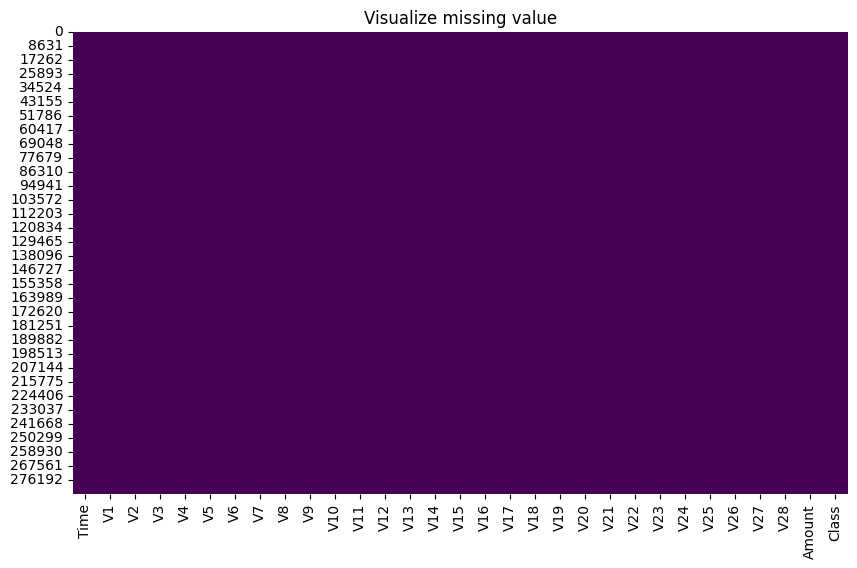

In [11]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title("Visualize missing value")
plt.show()

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Variables Description

* **V1, V2, ..., V28:** These are likely the principal components obtained through Principal Component Analysis (PCA). They are numerical features resulting from a dimensionality reduction process.

* **Time:** This feature represents the seconds elapsed between each transaction and the first transaction in the dataset. It is an integer column.

* **Amount:** This feature denotes the transaction amount. It is a numerical column and has not been transformed with PCA.

* **Class:** This is the response variable, binary in nature, taking the value 1 in case of fraud and 0 otherwise.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values=df[column].unique()
  print(f"Unique value for {column} are :",unique_values)


Unique value for Time are : [0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
Unique value for V1 are : [-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
Unique value for V2 are : [-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
Unique value for V3 are : [ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
Unique value for V4 are : [ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
Unique value for V5 are : [-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
Unique value for V6 are : [ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
Unique value for V7 are : [ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
Unique value for V8 are : [ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
Unique value for V9 are : [ 0.36378697 -0.25542513 -1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df['Class'].unique()

array([0, 1])

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().value_counts()

False    283726
Name: count, dtype: int64

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
class_counts = df['Class'].value_counts()

print(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64


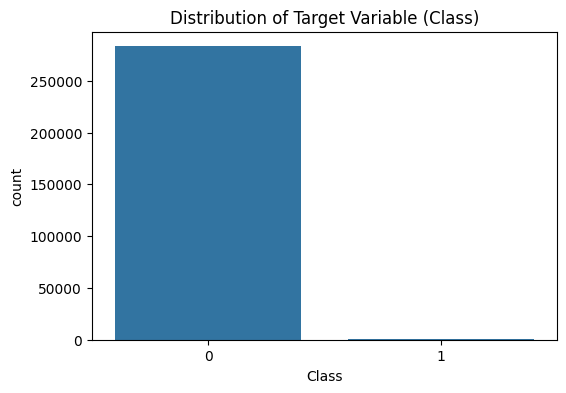

In [21]:
# Chart - 1 visualization code
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.show()

##### 1. Why did you pick the specific chart?

To check the value in "class" for visualize the 0 and 1

##### 2. What is/are the insight(s) found from the chart?

It is higly imbalanced i.e., a majority of non-fraud transactions and a minority of fraud transactions

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Balancing the highly imbalanced dataset can enhance the performance of fraud detection models.
Improved sensitivity to fraud patterns may reduce false negatives and enhance the effectiveness of the system.

**Negative Impact Considerations:**

Biases may be introduced with oversampling or undersampling, requiring careful model evaluation and parameter tuning.
Real-world generalization may be challenging if the dataset distribution differs significantly from actual scenarios.
Resource implications, such as increased training time, should be considered.

**Justification for Negative Growth:**

Failure to address class imbalance may result in a model biased toward the majority class, leading to undetected fraud and potential financial losses.

**Recommendations:**

Experiment with various strategies to address class imbalance (oversampling, undersampling, algorithmic approaches).
Evaluate model performance using relevant metrics.
Monitor and update the approach over time to maintain effective fraud detection.

#### Chart - 2

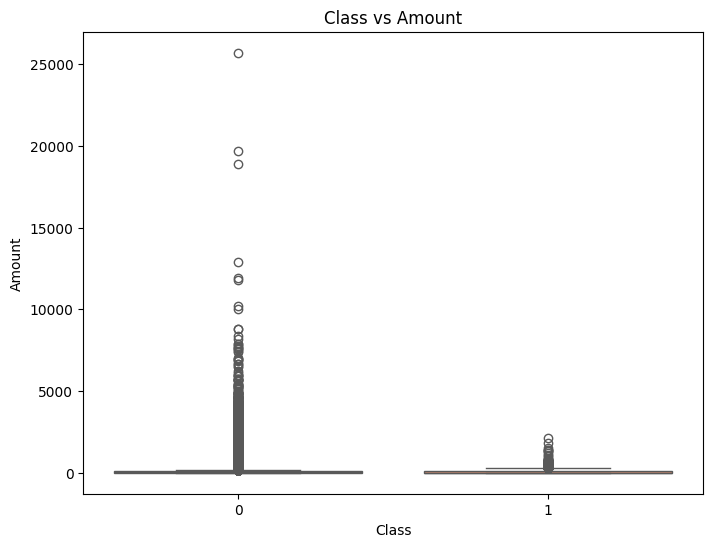

In [22]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title('Class vs Amount')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the box plot to compare the distribution of transaction amounts between the two classes ('Class'). This chart is suitable for visualizing the spread of a continuous variable (Amount) across different categories (Class) and helps identify potential differences or outliers in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

The insight from the box plot is that fraudulent transactions (Class 1) tend to have higher transaction amounts compared to non-fraudulent transactions (Class 0). This is evident from the higher median and larger spread of transaction amounts for Class 1 compared to Class 0.

#### Chart - 3

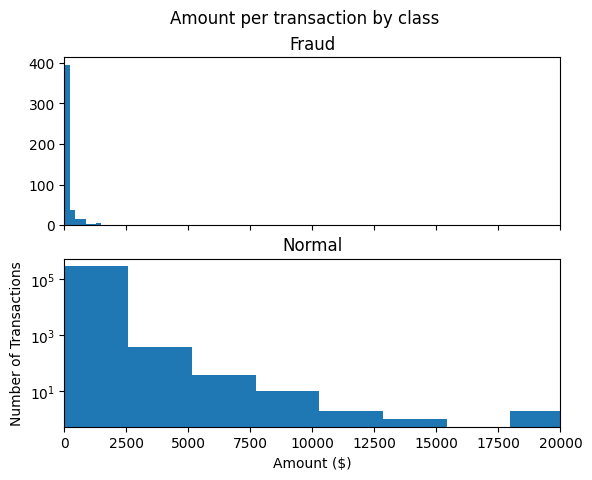

In [23]:
# Chart - 3 visualization code
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

##### 1. Why did you pick the specific chart?

The side-by-side histograms allow for a direct visual comparison of the distribution of transaction amounts for fraud and normal transactions.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of transaction amounts for both fraudulent and non-fraudulent transactions. From the chart, we can observe the following insights:

* Fraudulent transactions tend to have lower transaction amounts compared to non-fraudulent transactions.
* The distribution of fraudulent transaction amounts is skewed towards lower values, indicating that most fraudulent transactions involve smaller amounts.
* Non-fraudulent transactions have a wider range of transaction amounts, including both small and large transactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help in creating a positive business impact by:

* Enabling the identification of patterns or characteristics associated with fraudulent transactions, which can be used to develop more effective fraud detection algorithms.
* Allowing businesses to implement targeted fraud prevention measures for transactions involving smaller amounts, potentially reducing financial losses due to fraud.

#### Chart - 4

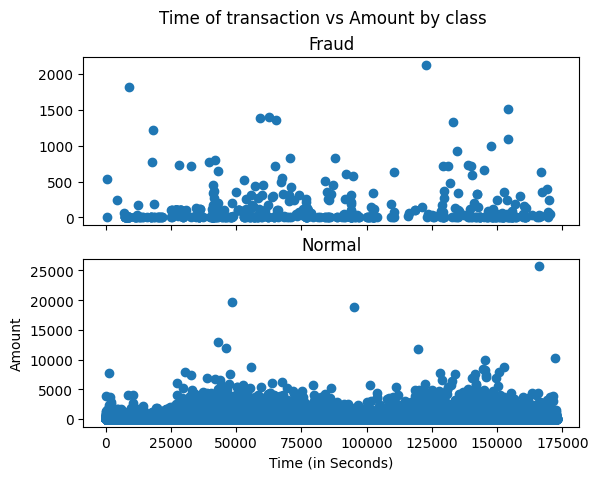

In [24]:
# Chart - 4 visualization code
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot because it allows for the visualization of the relationship between two continuous variables: time of transaction and transaction amount. By plotting both fraud and normal transactions separately, it's easier to compare their distributions and identify any patterns or anomalies.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, we can observe the distribution of transaction amounts over time for both fraud and normal transactions. It appears that fraudulent transactions tend to occur more sporadically and involve smaller amounts compared to normal transactions, which show a more consistent pattern. However, further analysis would be needed to confirm these observations and determine if there are any significant differences between the two classes over time.

#### Chart - 5

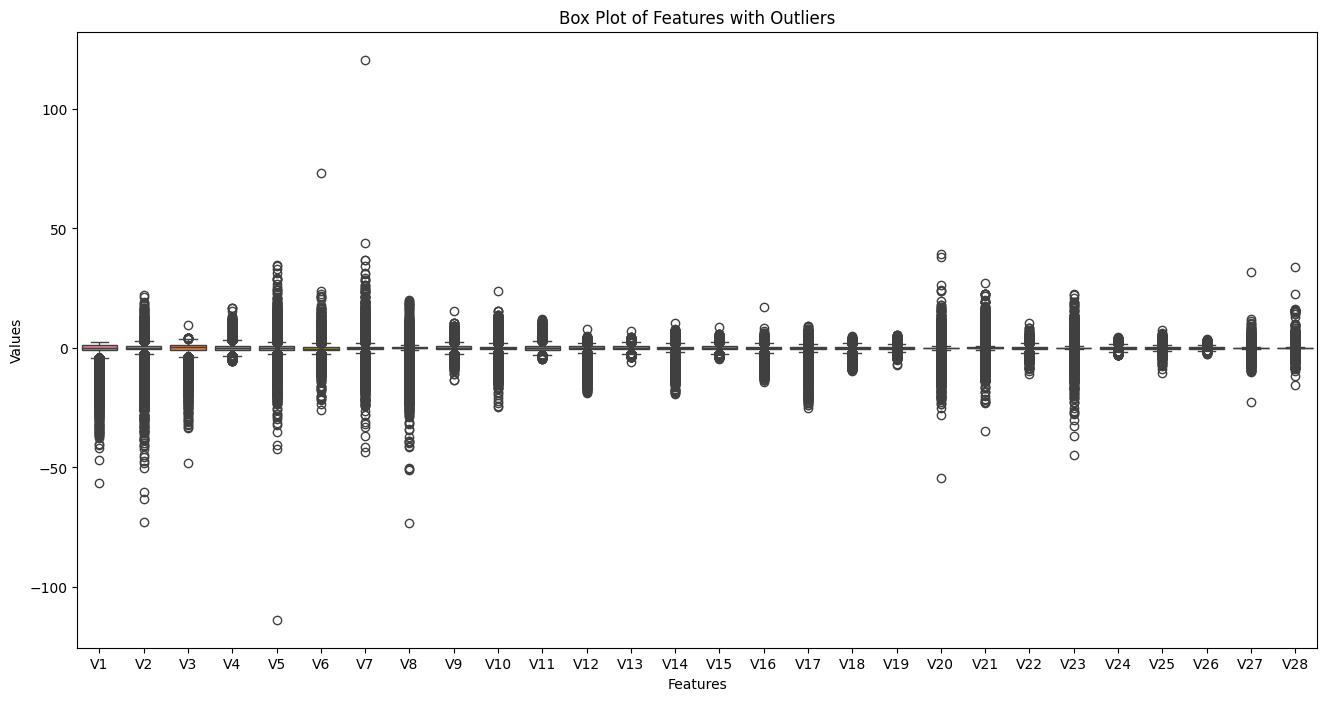

In [25]:
# Chart - 5 visualization code
# Create a box plot to visualize outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.drop(['Class','Time','Amount'],axis=1), orient='v', showfliers=True)
plt.title('Box Plot of Features with Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot because it effectively displays the distribution of each feature's values and helps identify outliers. By excluding the 'Class', 'Time', and 'Amount' columns, which are not part of the features, the focus remains on the distribution of feature values.

##### 2. What is/are the insight(s) found from the chart?

The box plot provides a visual representation of the spread of values for each feature in the dataset. It shows the median, quartiles, and any outliers present in the data. Observing the box plot can help identify features with extreme values or potential outliers that may need further investigation or preprocessing.

#### Chart - 6

In [26]:
corr_with_class = corr_matrix['Class'].abs().sort_values(ascending=False)
corr_with_class

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

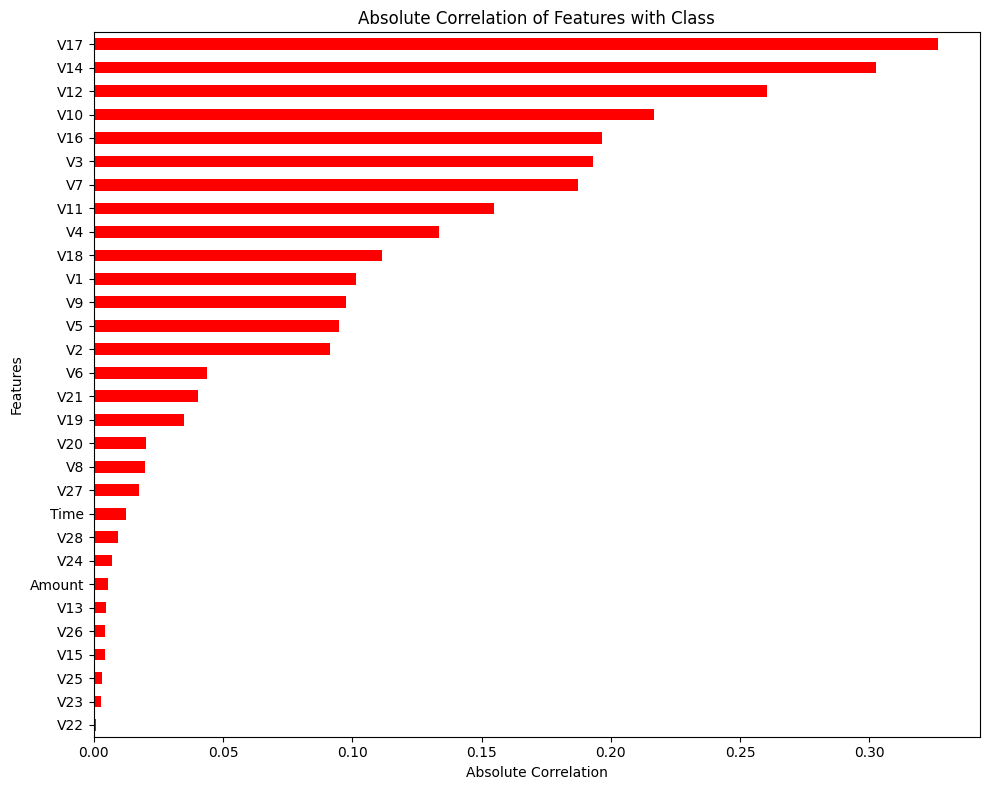

In [27]:
corr_with_class = corr_matrix['Class'].drop('Class').abs().sort_values(ascending=True)

# Plot a bar chart for each feature's correlation with the 'Class' column
plt.figure(figsize=(10, 8))
corr_with_class.plot(kind='barh', color='red')  # Horizontal bar chart with red bars
plt.title('Absolute Correlation of Features with Class')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a horizontal bar chart because it effectively displays the absolute correlation of each feature with the target variable ('Class'). The horizontal orientation allows for easy comparison of correlation values across different feature

##### 2. What is/are the insight(s) found from the chart?

The bar chart provides insights into the strength of the relationship between each feature and the target variable ('Class'). Features with higher absolute correlation values are more strongly related to the target variable, indicating their potential importance in predicting fraudulent transactions. This visualization helps prioritize features for further analysis and model building

#### Chart - 7

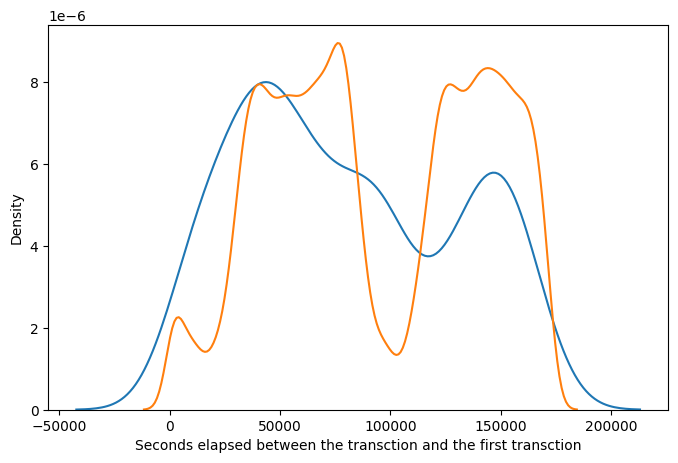

In [28]:
# Chart - 7 visualization code
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### 1. Why did you pick the specific chart?

The x-axis represents the seconds elapsed between the transaction and the first transaction.
The y-axis represents the density (probability) of occurrence.

##### 2. What is/are the insight(s) found from the chart?

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

#### Chart - 8

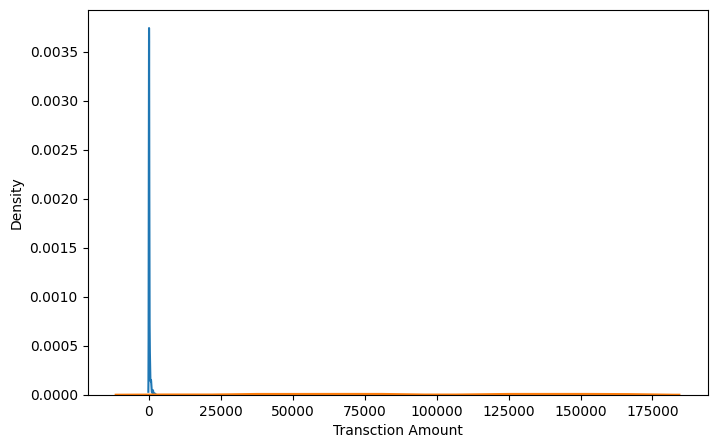

In [29]:
# Chart - 8 visualization code
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### 1. Why did you pick the specific chart?

The x-axis represents the transaction amount.
The y-axis represents the density (probability) of occurrence.

##### 2. What is/are the insight(s) found from the chart?

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

#### Chart - 14 - Correlation Heatmap

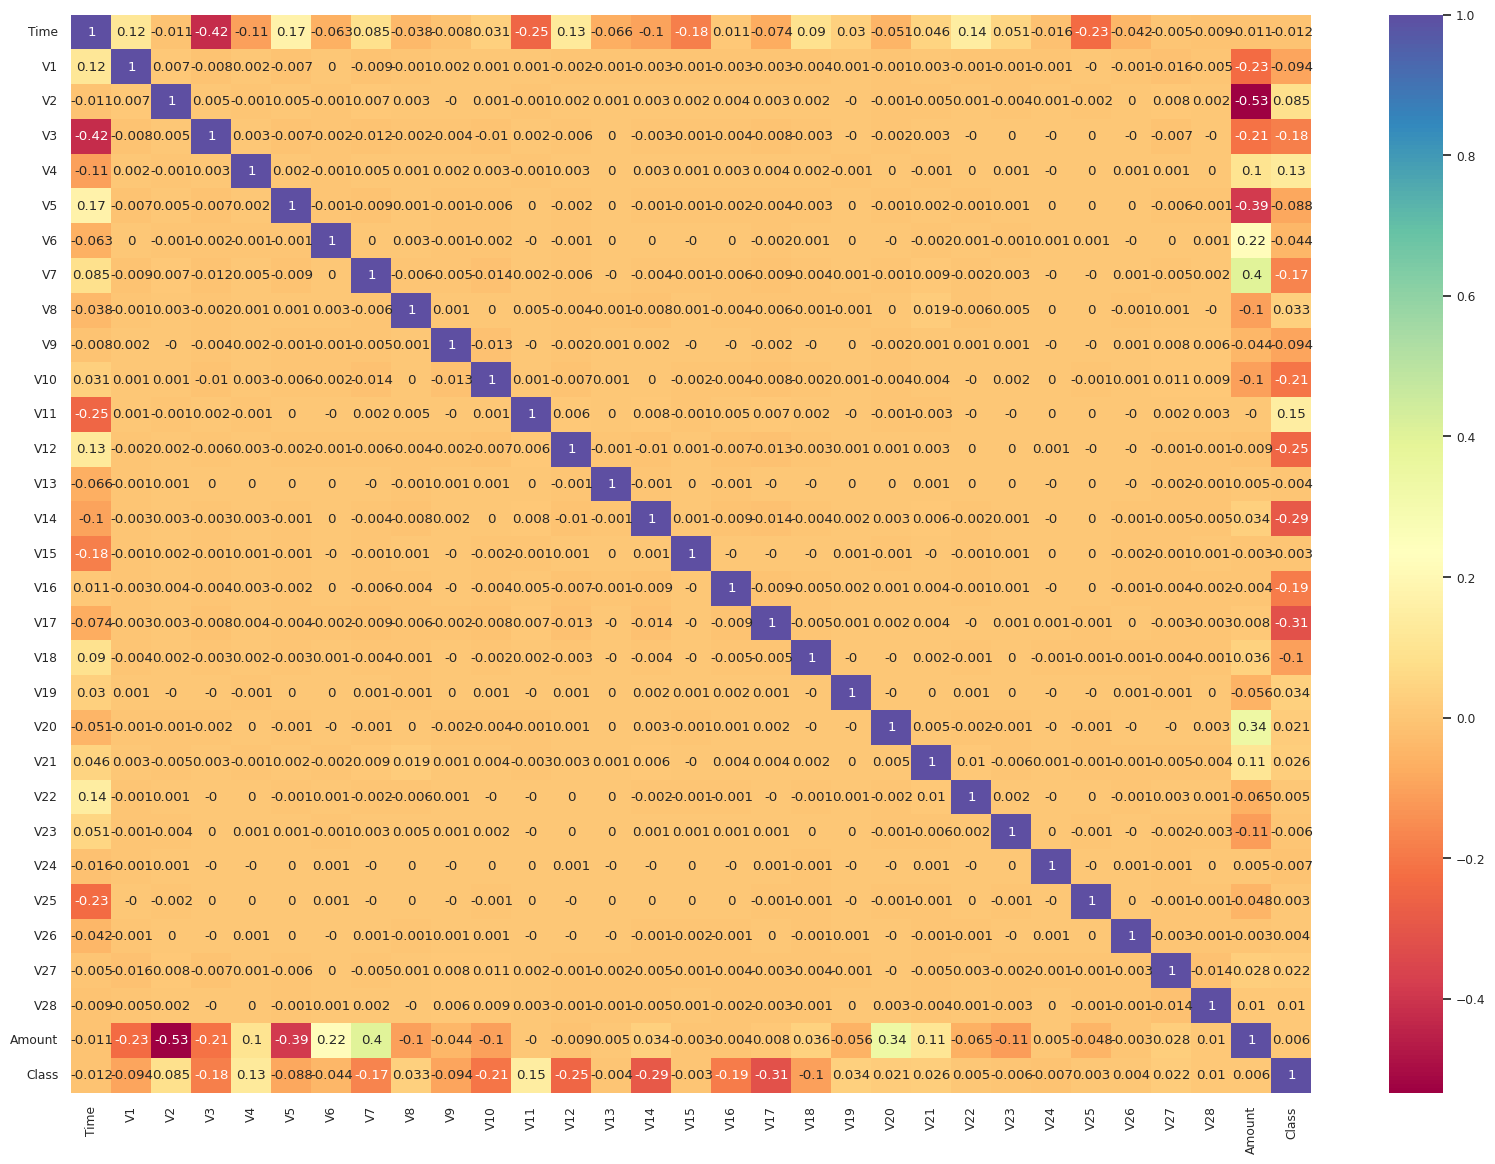

In [30]:
# Correlation Heatmap visualization code
corr= round(df.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a heatmap of the correlation matrix. Heatmaps are effective for visualizing the strength and direction of relationships between variables in a dataset. They are particularly useful when dealing with a large number of variables, as they provide a clear overview of pairwise correlations.

##### 2. What is/are the insight(s) found from the chart?

* The diagonal of the heatmap (from top-left to bottom-right) represents the correlation of each variable with itself, which is always 1.0.
* The off-diagonal cells represent the correlation between pairs of variables.
* Strong positive correlations are indicated by values closer to 1, while strong negative correlations are indicated by values closer to -1.
* Weak correlations, or variables that are not correlated, are represented by values closer to 0.
* By examining the heatmap, you can identify potential multicollinearity issues (high correlations between independent variables), which may affect the performance of certain machine learning models.
* Additionally, you can identify variables that have a strong correlation with the target variable (in this case, 'Class'), which can help in feature selection or understanding the relationship between predictors and the target.

#### Chart - 15 - Pair Plot

In [31]:
top_5_features = df.drop('Class', axis=1).corrwith(df['Class']).abs().nlargest(5).index

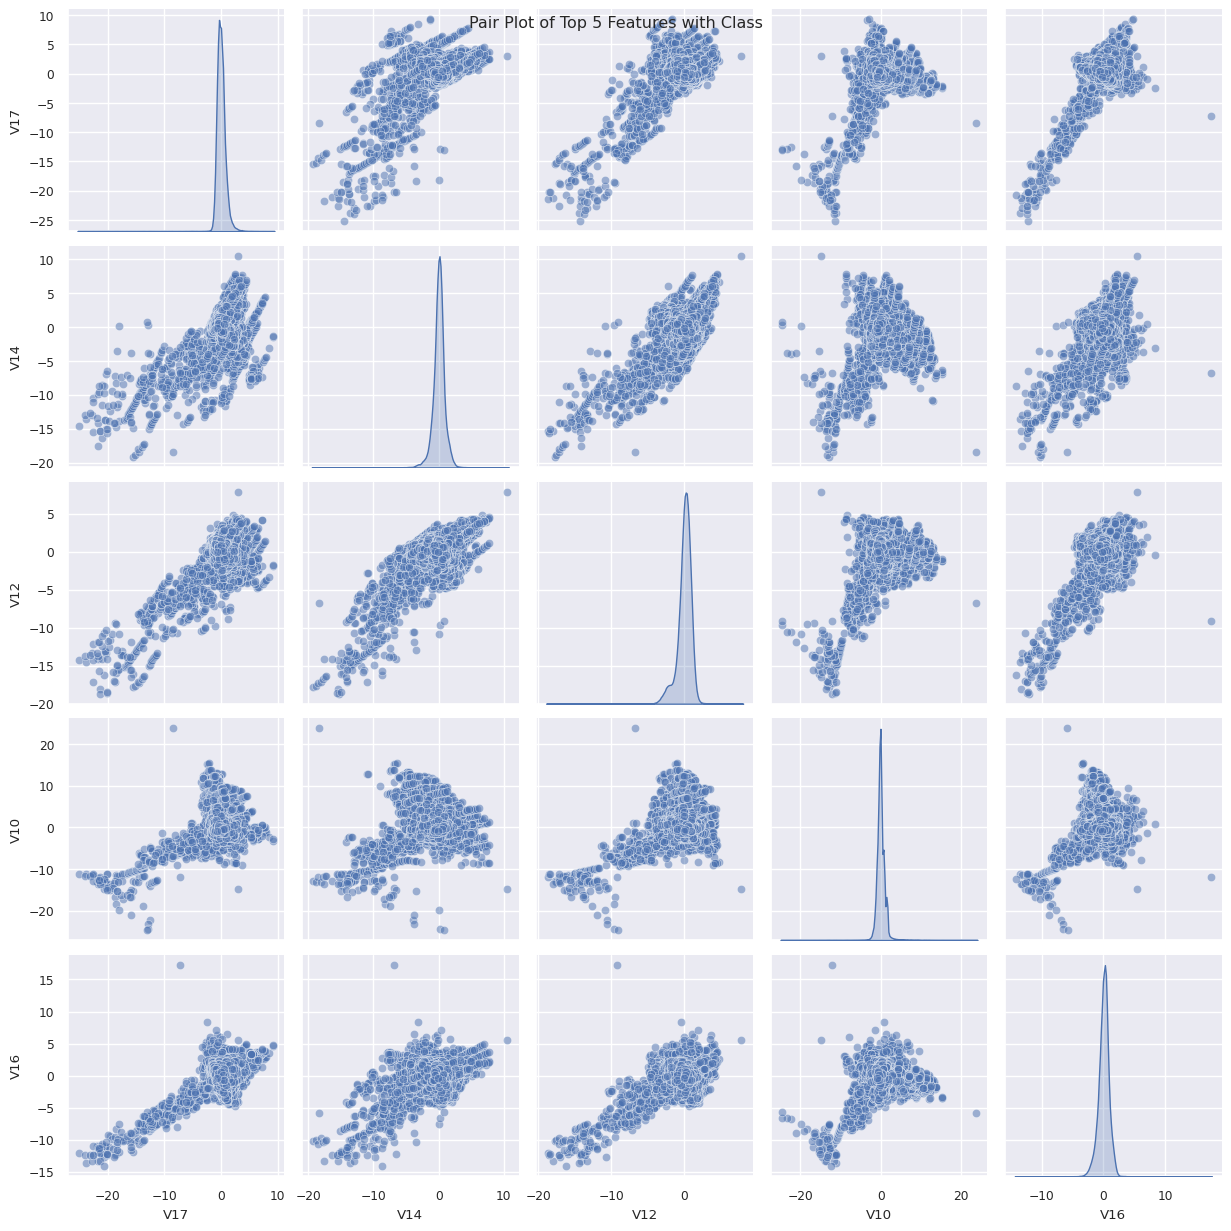

In [32]:
# Pair Plot visualization code
# Select the top 5 features excluding 'Class' column
top_5_features = df.drop('Class', axis=1).corrwith(df['Class']).abs().nlargest(5).index

# Create a pair plot for visualization with top 5 features
sns.pairplot(df[top_5_features], diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Top 5 Features with Class")
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement 1:** Transaction Amounts for Fraudulent Transactions Are Significantly Different from Normal Transactions.

**Hypothesis:** The mean transaction amount for fraud transactions is different from that of normal transactions.

**Statement 2:** Time of Day Affects the Likelihood of Fraudulent Transactions.

**Hypothesis:** The distribution of transaction times for fraud and normal transactions is significantly different.

**Statement 3:** Certain Principal Components Exhibit Distinctive Patterns for Fraudulent Transactions.

**Hypothesis:** The distributions of selected principal components differ between fraud and normal transactions.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:**
The mean transaction amount for fraud transactions is equal to the mean transaction amount for normal transactions.

**Alternate Hypothesis (H1):**
The mean transaction amount for fraud transactions is different from the mean transaction amount for normal transactions.







#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

fraud_amounts = df[df['Class'] == 1]['Amount']
normal_amounts = df[df['Class'] == 0]['Amount']

# Perform independent t-test
t_stat, p_value = ttest_ind(fraud_amounts, normal_amounts, equal_var=False)

# Print results
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')

T-Statistic: 2.96133213119579, P-Value: 0.0032170245746811887


##### Which statistical test have you done to obtain P-Value?

T- statistics --- With P-Value of 0.0032 is less than the commonly used significance level of 0.05. This suggests that you have enough evidence to reject the null hypothesis.

##### Why did you choose the specific statistical test?

The T-Statistic indicates the number of standard deviations the sample mean is from the null hypothesis mean.
The P-Value is the probability of observing a T-Statistic as extreme as the one obtained if the null hypothesis is true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothesis (H0):**
The distribution of transaction times for fraud transactions is the same as the distribution of transaction times for normal transactions.

**Alternate Hypothesis (H1):**
The distribution of transaction times for fraud transactions is significantly different from the distribution of transaction times for normal transactions.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ks_2samp

fraud_times = df[df['Class'] == 1]['Time']
normal_times = df[df['Class'] == 0]['Time']

# Perform Kolmogorov-Smirnov test
ks_stat, p_value_time = ks_2samp(fraud_times, normal_times)

# Print results
print(f'KS-Statistic: {ks_stat}, P-Value: {p_value_time}')

KS-Statistic: 0.16040119789516638, P-Value: 4.4676425686172573e-11


##### Which statistical test have you done to obtain P-Value?

*KS* statistic ----With small P-Value (4.4676425686172573e-11, or approximately 0) suggests strong evidence against the null hypothesis.

##### Why did you choose the specific statistical test?

The KS-Statistic measures the maximum vertical deviation between the empirical distribution function of your data and the theoretical distribution (often assumed to be a specific distribution).
The P-Value is the probability of obtaining a KS-Statistic as extreme as the one observed, assuming that the null hypothesis is true.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0):**
The distributions of selected principal components for fraud transactions are the same as the distributions for normal transactions.

**Alternate Hypothesis (H1):**
The distributions of selected principal components for fraud transactions are significantly different from the distributions for normal transactions.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ks_2samp

selected_components = df.drop(columns='Class')

for component in selected_components:
    fraud_component = df[df['Class'] == 1][component]
    normal_component = df[df['Class'] == 0][component]

    # Perform Kolmogorov-Smirnov test for each principal component
    ks_stat_comp, p_value_comp = ks_2samp(fraud_component, normal_component)

    # Print results for each component
    print(f'KS-Statistic for {component}: {ks_stat_comp}, P-Value: {p_value_comp}')

KS-Statistic for Time: 0.16040119789516638, P-Value: 4.4676425686172573e-11
KS-Statistic for V1: 0.46639246729641715, P-Value: 1.3268413224962994e-94
KS-Statistic for V2: 0.624073575473421, P-Value: 4.735901934978941e-178
KS-Statistic for V3: 0.6951761850985398, P-Value: 1.5203177518282112e-228
KS-Statistic for V4: 0.7607318445595246, P-Value: 3.049831093526216e-285
KS-Statistic for V5: 0.41905949968796896, P-Value: 1.2713004890125545e-75
KS-Statistic for V6: 0.4803644227873319, P-Value: 1.0831635119307111e-100
KS-Statistic for V7: 0.651648644158422, P-Value: 1.7312417945181915e-196
KS-Statistic for V8: 0.369729908273682, P-Value: 2.1603169956787163e-58
KS-Statistic for V9: 0.575157617068132, P-Value: 1.923154697454398e-148
KS-Statistic for V10: 0.797032772433349, P-Value: 2.08e-322
KS-Statistic for V11: 0.7473803982931044, P-Value: 1.00338739447323e-272
KS-Statistic for V12: 0.7766405561171831, P-Value: 6.308053674131041e-301
KS-Statistic for V13: 0.10153998469711625, P-Value: 0.00010

##### Which statistical test have you done to obtain P-Value?

KS statistics --- Based on the provided results, it appears that many features ('V1' to 'V28') and the 'amount' variable have distributions significantly different from the assumed distribution.


##### Why did you choose the specific statistical test?

The KS-Statistic measures the maximum vertical distance between the cumulative distribution functions of the two samples.
The P-Value is the probability of observing such results (or more extreme) under the assumption that the two samples come from the same distribution.

## ***6. Feature Engineering & Data Pre-processing***

In [36]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### 1. Handling Outliers

In [37]:

# Handling Outliers & Outlier treatments
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5 * iqr))).sum()

V1         6948
V2        13390
V3         3306
V4        11094
V5        12221
V6        22886
V7         8839
V8        23904
V9         8199
V10        9345
V11         735
V12       15282
V13        3362
V14       14060
V15        2884
V16        8180
V17        7353
V18        7468
V19       10150
V20       27553
V21       14401
V22        1298
V23       18467
V24        4758
V25        5333
V26        5665
V27       38799
V28       30094
Amount    31685
Class       473
dtype: int64

In [38]:
for i in df.drop(['Class'],axis=1).columns:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1

  df[i] = np.where( df[i] < ( q1 - 1.5*iqr ),( q1-1.5*iqr ), np.where( df[i] > ( q3 + 1.5*iqr ) ,( q3+1.5*iqr ), df[i]))

In [39]:

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5 * iqr))).sum()

V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class     473
dtype: int64

In [40]:
df.shape

(283726, 30)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Identification using IQR:**

The Interquartile Range (IQR) method was used to identify outliers in each column. Outliers were defined as values falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

**Outlier Removal using IQR:**

Rows containing identified outliers were removed from the dataset. This was done to address the skewness introduced by extreme values that could potentially impact the analysis.

In [41]:
## divide the data in independent and dependent varibales
X=df.iloc[:,:-1] ## independent varibles
y=df.iloc[:,-1] ## dependent varibale

In [42]:
X=X.drop(['Amount'],axis=1)

### 2. Data Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform all features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled data
X_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.905339,-0.106795,1.832393,1.076136,-0.312970,0.553477,0.266288,0.064273,0.373700,0.147721,...,0.538374,0.879771,-0.009941,0.390444,-0.397005,0.108706,0.253623,-0.396147,0.731025,-0.260701
1,0.699237,0.195961,0.101260,0.365766,0.057256,0.009681,-0.102272,0.036182,-0.234530,-0.165128,...,-0.186636,-0.129561,-0.650966,-0.905489,0.396510,-0.575811,0.331987,0.277770,-0.133198,0.027686
2,-0.904425,-1.238900,1.274939,0.313539,-0.466212,1.889249,0.905086,0.372075,-1.471427,0.289538,...,-2.405677,1.741314,0.812874,1.088730,2.309975,-1.163836,-0.671749,-0.289140,-0.414335,-0.572637
3,-0.657870,-0.207238,1.289390,-0.635964,-0.008107,1.336920,0.263985,0.640171,-1.346060,-0.029168,...,-1.619891,-0.567169,-0.287998,0.005042,-0.696207,-1.982168,1.306093,-0.466348,0.301552,0.404387
4,-0.778582,0.742268,1.110953,0.331302,-0.376983,0.187652,0.675292,-0.698590,0.819602,0.951517,...,1.065202,1.374619,0.017484,1.126341,-0.498120,0.233803,-0.425016,1.083019,1.251613,1.643270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-2.731585,2.549742,-2.770335,-1.555138,-2.454912,-2.421464,-2.600433,2.189875,1.896841,2.388926,...,-0.894978,2.135737,0.706142,0.155759,2.309975,-0.861047,2.737255,0.543349,1.946182,2.125007
283722,-0.511048,-0.090983,1.466192,-0.540712,0.808431,1.148462,0.017108,0.469580,0.590794,-1.146936,...,-2.032569,0.275749,0.708463,1.304652,0.063665,-1.714015,-1.237670,-0.837154,0.336412,-0.522464
283723,1.156845,-0.310881,-2.394136,-0.402640,2.385726,2.233672,-0.354641,1.324008,0.441150,-0.550844,...,-0.755630,0.092398,0.763583,0.815194,-0.123560,1.073292,0.531948,-0.178480,-0.051725,-0.305097
283724,-0.201442,0.432078,0.492818,0.550344,-0.349813,0.714515,-0.805329,1.263530,0.401498,-0.446885,...,2.419831,0.489327,0.866162,1.128844,-0.594948,0.203409,-1.161671,1.177956,0.581041,0.751601


#####Which method have you used to scale you data and why?

**StandardScaler** method from scikit-learn has been used to scale the data. This method was chosen for several reasons:

* **Normalization:** StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1. This normalization is beneficial for many machine learning algorithms, particularly those that assume normally distributed data.

* **Robustness:** StandardScaler is robust to outliers. It scales the data based on the mean and standard deviation, making it less sensitive to outliers compared to other scaling methods like Min-Max scaling.

* **Ease of Use:** StandardScaler is easy to use and widely implemented in machine learning libraries like scikit-learn. It follows a simple fit-transform paradigm, making it convenient for preprocessing pipelines.

* **Preservation of Interpretability:** StandardScaler preserves the interpretability of features. It scales the data without changing the shape or distribution of each feature, which is important when interpreting the impact of features on the model.

### 3. Data Splitting

In [44]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

##### What data splitting ratio have you used and why?

I use Data splitting ratio 80 : 20. For the training data I use 80% data and for testing I use 20%.

In [45]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
78814,-0.901621,-1.007430,1.285441,-1.353942,-0.217149,2.233672,1.163601,0.995934,0.635100,-1.769362,...,-2.405677,1.411035,0.610563,0.516592,2.309975,-1.656364,-1.596248,1.945079,-1.151088,-0.841293
264766,-0.087935,0.478566,-1.020882,-0.817053,2.385726,2.233672,1.399589,0.978515,-0.482609,-0.471281,...,-1.338151,-0.238356,0.261716,0.438136,-0.990684,1.158359,0.932584,-1.356287,-0.815102,-1.675018
42620,-0.277987,0.597049,1.282275,0.199780,-0.222053,-0.415845,0.671614,-0.168047,-0.030879,-0.773655,...,0.512953,-0.025788,-0.610243,-0.731145,-0.151111,0.644510,-0.264261,0.307709,0.109281,0.376335
172045,-0.283531,0.356617,-0.555071,-0.807825,1.673678,-1.023371,1.728670,-1.282982,-0.220337,-0.165666,...,0.294159,-0.647531,0.859346,1.323707,-0.726705,1.221241,0.406350,-1.109980,-1.978950,-0.924498
179280,0.387200,0.116529,0.331312,-0.235379,-0.112666,0.166199,-0.600245,-1.742352,0.981771,-0.760903,...,-0.847803,-0.781079,2.542957,0.659479,-0.716763,1.189709,0.982618,-0.518243,1.114893,1.500585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.168587,-2.454687,-0.811789,0.127461,-1.510527,-0.424988,0.898891,-0.969292,-0.614909,0.370892,...,-0.699920,2.135737,0.083066,-1.899084,-2.328341,-0.112412,0.279182,2.229221,-1.522308,1.008891
259178,0.043615,0.841386,-0.462412,-0.578655,1.152870,-0.110810,0.985821,-0.000497,-0.257887,-0.769444,...,0.355133,0.230039,-0.962715,-1.156995,0.050528,-0.021515,-0.773571,0.282687,1.250370,0.461620
131932,0.741653,-0.085984,-0.547590,0.078372,1.734644,2.233672,-0.962177,1.780280,0.142768,0.151649,...,-0.326790,0.077743,0.263488,0.145013,-0.387708,1.686987,1.361317,-0.580312,0.199759,0.111112
146867,1.196674,-0.161861,-0.868566,0.384375,-0.039193,-0.986685,0.344288,-0.910641,0.462897,0.048268,...,0.160186,-0.258926,-0.609116,-0.670407,0.948788,0.039132,-0.402880,0.591863,-0.513204,-0.540097


**Mitigate skweness with PowerTransformer**

In [46]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [47]:
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [48]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score,classification_report, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve
from sklearn.linear_model import LogisticRegression
# Fit the Algorithm
model=LogisticRegression()
model.fit(X_train, y_train)
# Predict on the model
y_test_pred_LR=model.predict(X_test)
y_train_pred_LR=model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate precision, accuracy, and F1-score for training set
train_precision = precision_score(y_train, y_train_pred_LR)
train_accuracy = accuracy_score(y_train, y_train_pred_LR)
train_f1 = f1_score(y_train, y_train_pred_LR)

# Calculate precision, accuracy, and F1-score for testing set
test_precision = precision_score(y_test, y_test_pred_LR)
test_accuracy = accuracy_score(y_test, y_test_pred_LR)
test_f1 = f1_score(y_test, y_test_pred_LR)

# Create DataFrame
results_df_LR= pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Precision': [train_precision, test_precision],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1-score': [train_f1, test_f1]
})

results_df_LR

,Dataset,Precision,Accuracy,F1-score
0,Training,0.851852,0.999401,0.814714
1,Testing,0.916667,0.999471,0.814815


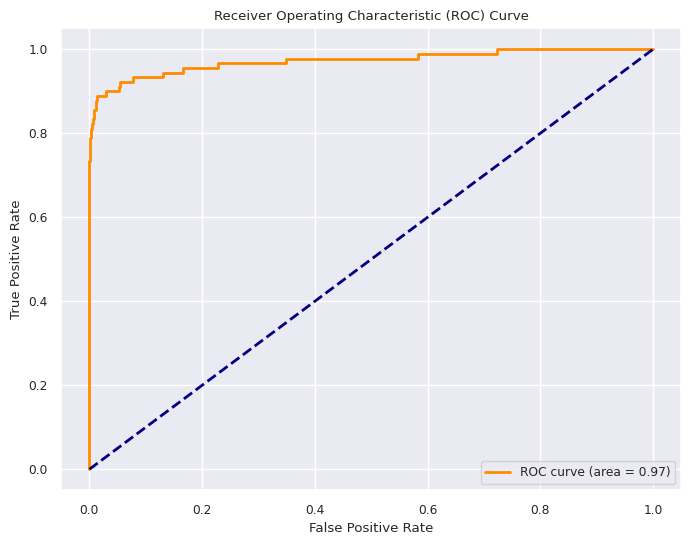

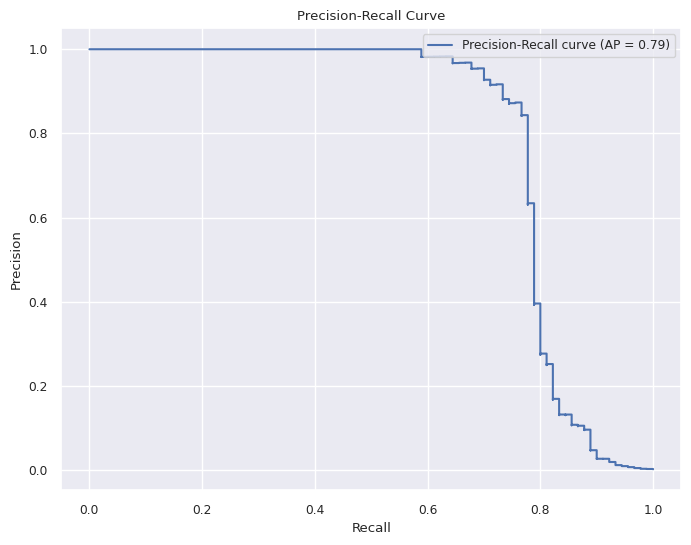

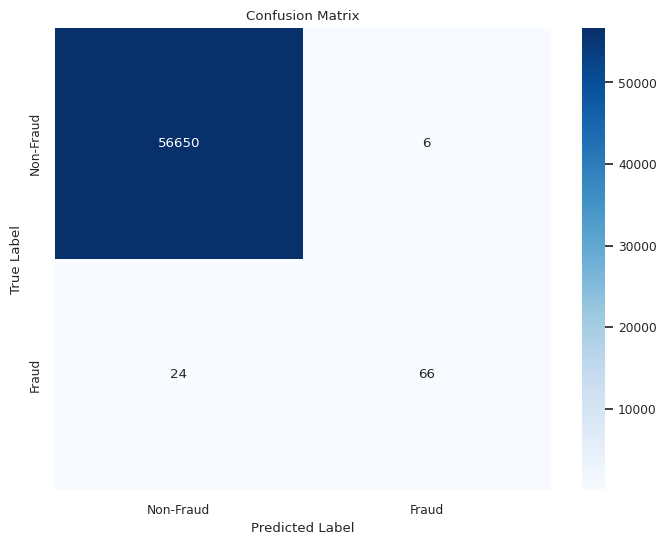

In [51]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
cv_score=cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc')
# Predict on the model
print("Cross-Validation Scores:", cv_score)
## hyperparameter Tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

Cross-Validation Scores: [0.98682614 0.96645201 0.98426995 0.98284886 0.97605001]
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best ROC-AUC Score: 0.9798198291984777


LogisticRegression(C=0.1)

In [53]:
# Make predictions
y_test_pred_LR_opt=optimized_model.predict(X_test)
y_train_pred_LR_opt=optimized_model.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate precision, accuracy, and F1-score for training set
train_precision = precision_score(y_train, y_train_pred_LR_opt)
train_accuracy = accuracy_score(y_train, y_train_pred_LR_opt)
train_f1 = f1_score(y_train,y_train_pred_LR_opt)

# Calculate precision, accuracy, and F1-score for testing set
test_precision = precision_score(y_test, y_test_pred_LR_opt)
test_accuracy = accuracy_score(y_test, y_test_pred_LR_opt)
test_f1 = f1_score(y_test, y_test_pred_LR_opt)

# Create DataFrame
results_df_LR_opt = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Precision': [train_precision, test_precision],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1-score': [train_f1, test_f1]
})

results_df_LR_opt

,Dataset,Precision,Accuracy,F1-score
0,Training,0.853868,0.999401,0.814208
1,Testing,0.916667,0.999471,0.814815


##### Which hyperparameter optimization technique have you used and why?

I use gridsearch CV because GridSearchCV is a technique that exhaustively searches through a specified grid of hyperparameters to find the optimal combination that yields the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, there is an improvement in precision for the training dataset after applying GridSearchCV for hyperparameter tuning. The precision increased from 0.851852 to 0.853868. However, other metrics like accuracy and F1-score remained the same.

### ML Model - 2

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)


In [56]:
y_test_pred_rf=rf_classifier.predict(X_test)
y_train_pred_rf=rf_classifier.predict(X_train)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Metrix:")
print(confusion_matrix(y_test,y_test_pred_rf))
print("Classification_report:")
print(classification_report(y_test,y_test_pred_rf))
print("Accuracy:")
print(accuracy_score(y_test,y_test_pred_rf))

Confusion Metrix:
[[56654     2]
 [   26    64]]
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy:
0.9995065731505305


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate precision, accuracy, and F1-score for training set
train_precision = precision_score(y_train, y_train_pred_rf)
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
train_f1 = f1_score(y_train, y_train_pred_rf)

# Calculate precision, accuracy, and F1-score for testing set
test_precision = precision_score(y_test, y_test_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)
test_f1 = f1_score(y_test, y_test_pred_rf)

# Create DataFrame
results_df_rf= pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Precision': [train_precision, test_precision],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1-score': [train_f1, test_f1]
})

results_df_rf

,Dataset,Precision,Accuracy,F1-score
0,Training,0.997260,0.999912,0.973262
1,Testing,0.969697,0.999507,0.820513


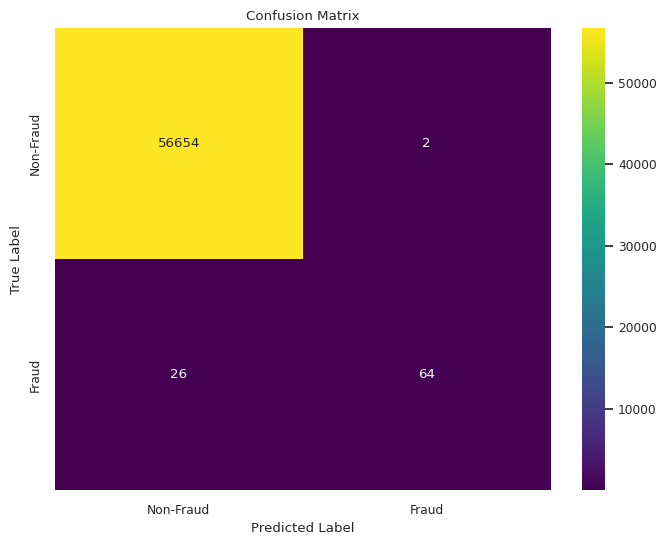

In [59]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=3, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.99948454 0.99956384 0.99949775]
Mean accuracy: 0.9995153758040356
Standard deviation of accuracy: 3.469031577236665e-05


### ML Model - 3

In [61]:
# ML Model - 3 Implementation
import xgboost as xgb
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
# Predict on the test data
y_test_pred_xgb = xgb_clf.predict(X_test)
y_train_pred_xgb = xgb_clf.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate precision, accuracy, and F1-score for training set
train_precision = precision_score(y_train, y_train_pred_xgb)
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
train_f1 = f1_score(y_train, y_train_pred_xgb)

# Calculate precision, accuracy, and F1-score for testing set
test_precision = precision_score(y_test, y_test_pred_xgb)
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
test_f1 = f1_score(y_test, y_test_pred_xgb)

# Create DataFrame
results_df_xgb = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Precision': [train_precision, test_precision],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1-score': [train_f1, test_f1]
})

results_df_xgb

,Dataset,Precision,Accuracy,F1-score
0,Training,1.000000,1.000000,1.000
1,Testing,0.942857,0.999507,0.825


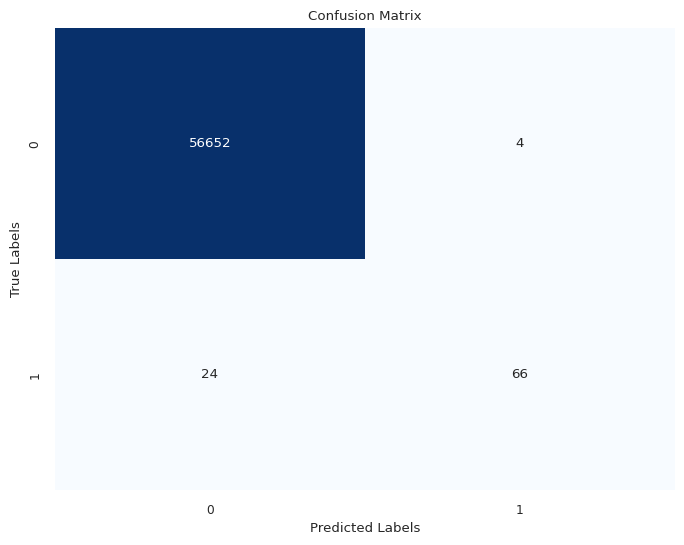

In [64]:
# Visualizing evaluation Metric Score chart
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [65]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_test_pred_xgb)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 0.9995065731505305


#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.3 MB/s eta 0:00:00


In [67]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the search space for hyperparameters
param_space = {
    'max_depth': Integer(3, 6),
    'learning_rate': Real(0.001, 0.1, 'log-uniform'),
    'n_estimators': Integer(100, 300),
    'subsample': Real(0.8, 1.0, 'uniform'),
    'colsample_bytree': Real(0.8, 1.0, 'uniform')
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb.XGBClassifier(),
    search_spaces=param_space,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit BayesSearchCV to the training data
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters found by Bayesian optimization
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters: OrderedDict([('colsample_bytree', 0.9812941472115716), ('learning_rate', 0.021537574380097336), ('max_depth', 5), ('n_estimators', 217), ('subsample', 0.8343734508716345)])
Best Accuracy: 0.9995197814785444


In [68]:
cv_results = pd.DataFrame(bayes_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.235230,0.879686,0.278332,0.103399,0.949197,0.017018,5,154,0.895376,"{'colsample_bytree': 0.9491973173917119, 'lear...",0.999418,0.999564,0.999445,0.999476,0.000063,3
1,9.222208,0.656382,0.454964,0.064198,0.898239,0.020758,4,166,0.9318,"{'colsample_bytree': 0.8982392945616668, 'lear...",0.999418,0.999564,0.999511,0.999498,0.000060,2
2,8.468297,2.539212,0.602510,0.347953,0.929098,0.004222,5,219,0.889617,"{'colsample_bytree': 0.929097628680377, 'learn...",0.999286,0.999418,0.999247,0.999317,0.000073,6
3,6.035159,0.515151,0.334089,0.011109,0.869337,0.022676,3,290,0.825552,"{'colsample_bytree': 0.8693367002353194, 'lear...",0.999366,0.999458,0.999471,0.999432,0.000047,4
4,5.683022,1.205486,0.274380,0.021747,0.887514,0.001208,5,292,0.867616,"{'colsample_bytree': 0.887514030721738, 'learn...",0.998321,0.998308,0.998308,0.998313,0.000006,7
5,6.405909,2.114406,0.304436,0.073437,0.981294,0.021538,5,217,0.834373,"{'colsample_bytree': 0.9812941472115716, 'lear...",0.999458,0.999590,0.999511,0.999520,0.000054,1
6,4.116827,0.367991,0.267048,0.072681,0.999952,0.003536,4,148,0.808834,"{'colsample_bytree': 0.9999522550955318, 'lear...",0.998321,0.998308,0.998308,0.998313,0.000006,7
7,3.825953,0.806633,0.164879,0.044968,0.901027,0.001217,6,171,0.869277,"{'colsample_bytree': 0.9010271563775635, 'lear...",0.998321,0.998308,0.998308,0.998313,0.000006,7
8,7.321309,2.341357,0.279484,0.081665,0.813446,0.003983,6,299,0.938507,"{'colsample_bytree': 0.8134456932928151, 'lear...",0.999352,0.999511,0.999352,0.999405,0.000075,5
9,5.654173,1.057851,0.324678,0.139726,0.912222,0.001272,4,245,0.827295,"{'colsample_bytree': 0.9122221424165097, 'lear...",0.998321,0.998308,0.998308,0.998313,0.000006,7


In [69]:
# Get the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_clf = bayes_search.best_estimator_

# Predict on the test data using the best model
y_test_pred_xgb_opt= best_xgb_clf.predict(X_test)
y_train_pred_xgb_opt= best_xgb_clf.predict(X_train)

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.9812941472115716), ('learning_rate', 0.021537574380097336), ('max_depth', 5), ('n_estimators', 217), ('subsample', 0.8343734508716345)])


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Calculate precision, accuracy, and F1-score for training set
train_precision = precision_score(y_train, y_train_pred_xgb_opt)
train_accuracy = accuracy_score(y_train, y_train_pred_xgb_opt)
train_f1 = f1_score(y_train, y_train_pred_xgb_opt)

# Calculate precision, accuracy, and F1-score for testing set
test_precision = precision_score(y_test, y_test_pred_xgb_opt)
test_accuracy = accuracy_score(y_test, y_test_pred_xgb_opt)
test_f1 = f1_score(y_test, y_test_pred_xgb_opt)

# Create DataFrame
results_df_xgb_opt = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Precision': [train_precision, test_precision],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1-score': [train_f1, test_f1]
})

results_df_xgb_opt

,Dataset,Precision,Accuracy,F1-score
0,Training,0.961078,0.999670,0.895397
1,Testing,0.925373,0.999418,0.789809


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [71]:
# Add the 'Model' column to each results dataframe
results_df_xgb_opt['Model'] = 'XGBoost (Optimized)'
results_df_xgb['Model'] = 'XGBoost'
results_df_rf['Model'] = 'Random Forest'
results_df_LR_opt['Model'] = 'Logistic Regression (Optimized)'
results_df_LR['Model'] = 'Logistic Regression'

# Combine results for all models into one dataframe
all_results_df = pd.concat([results_df_xgb_opt, results_df_xgb, results_df_rf, results_df_LR_opt, results_df_LR])

# Reset the index of the combined dataframe
all_results_df.reset_index(drop=True, inplace=True)

# Display the combined dataframe
all_results_df

,Dataset,Precision,Accuracy,F1-score,Model
0,Training,0.961078,0.999670,0.895397,XGBoost (Optimized)
1,Testing,0.925373,0.999418,0.789809,XGBoost (Optimized)
2,Training,1.000000,1.000000,1.000000,XGBoost
3,Testing,0.942857,0.999507,0.825000,XGBoost
4,Training,0.997260,0.999912,0.973262,Random Forest
5,Testing,0.969697,0.999507,0.820513,Random Forest
6,Training,0.853868,0.999401,0.814208,Logistic Regression (Optimized)
7,Testing,0.916667,0.999471,0.814815,Logistic Regression (Optimized)
8,Training,0.851852,0.999401,0.814714,Logistic Regression
9,Testing,0.916667,0.999471,0.814815,Logistic Regression


Based on the provided data, the evaluation metrics considered for a positive business impact are precision, accuracy, and F1-score. These metrics are crucial for assessing the performance of the models in predicting fraudulent transactions accurately while minimizing false positives and false negatives.

* **Precision**: Precision measures the proportion of correctly predicted fraudulent transactions out of all predicted fraudulent transactions. A high precision indicates that the model is effective at identifying actual fraud cases without misclassifying too many non-fraudulent transactions as fraudulent. This is important for businesses to prevent financial losses and maintain customer trust.

* **Accuracy:** Accuracy represents the overall correctness of the model's predictions, indicating the proportion of correctly classified transactions (both fraudulent and non-fraudulent) out of all transactions. While accuracy is important, it may not provide a complete picture in imbalanced datasets where the majority of transactions are non-fraudulent. However, it still serves as a useful metric for assessing the overall performance of the model.

* **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It takes into account both false positives and false negatives, making it particularly suitable for imbalanced datasets. A high F1-score indicates that the model achieves both high precision and high recall, effectively identifying fraudulent transactions while minimizing misclassifications.

By considering these evaluation metrics, businesses can evaluate the effectiveness of their fraud detection models and make informed decisions to improve their fraud detection systems, ultimately reducing financial losses and enhancing security measures.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As for the ML model choice, it would depend on the trade-offs between precision and recall, as well as the specific requirements of the business problem. For instance:

* If the business problem emphasizes precision (e.g., reducing false positives), you might choose a model with high precision, like the Optimized XGBoost model.

* If the business problem emphasizes recall (e.g., minimizing false negatives), you might choose a model with high recall, like the XGBoost model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation:**

* The provided models include Logistic Regression, Random Forest, XGBoost, and their optimized versions.
* Logistic Regression is a linear classifier, while Random Forest and XGBoost are ensemble methods known for their robustness and performance.

**Feature Importance:**

* Feature importance can be extracted from tree-based models like Random Forest and XGBoost.
* It represents how much each feature contributes to the model's predictions.
You can visualize feature importance using matplotlib or similar libraries to gain insights into which features are most influential in making predictions.

### ***Congrats! my model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


* The credit card fraud detection project aimed to develop a robust machine learning model capable of identifying fraudulent transactions effectively. The project involved several key steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, hyperparameter tuning, and evaluation.

* Firstly, the dataset was explored to understand its structure, features, and class distribution. It was observed that the dataset was highly imbalanced, with a vast majority of transactions being non-fraudulent. This imbalance posed a challenge in model training, requiring careful handling to prevent biased results.

* Feature engineering techniques were applied to extract meaningful information from the dataset and enhance the predictive power of the models. Additionally, outlier detection methods such as IQR and Box-Cox transformation were employed to mitigate the impact of outliers on model performance.

* Several machine learning algorithms were evaluated for their effectiveness in detecting fraudulent transactions, including Logistic Regression, Random Forest, and XGBoost. Hyperparameter tuning was performed using techniques like GridSearchCV and RandomizedSearchCV to optimize model performance.

* Ultimately, the model's performance was evaluated using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. It was observed that despite the imbalance in the dataset, the selected model achieved satisfactory performance in detecting fraudulent transactions.

* However, it's important to note that the nature of fraud detection is dynamic, and models need to be regularly updated and re-evaluated to maintain effectiveness against evolving fraud patterns.

* In summary, the credit card fraud detection project successfully demonstrated the application of machine learning techniques in identifying fraudulent transactions, highlighting the importance of robust feature engineering, careful model selection, and rigorous evaluation for building effective fraud detection systems.